In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)


# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os


# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

from matplotlib import font_manager, rc
import platform


path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)


mpl.rcParams['axes.unicode_minus'] = False


# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3


import seaborn as sns

import scipy as sp
from scipy import stats


# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"


# 노트북 실행 결과를 동일하게 유지하기 위해
# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경되면
# 훈련용 데이터가 자주 변경되면 결국 모든 데터를 가지고 모델을 생성하는 결과
# Outfit을 만드는 효과를 가져옴.
np.random.seed(42)

In [4]:
# 데이터 가져오기
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data)
print(target)

[[6.320e-03 1.800e+01 2.310e+00 ... 1.530e+01 3.969e+02 4.980e+00]
 [2.731e-02 0.000e+00 7.070e+00 ... 1.780e+01 3.969e+02 9.140e+00]
 [2.729e-02 0.000e+00 7.070e+00 ... 1.780e+01 3.928e+02 4.030e+00]
 ...
 [6.076e-02 0.000e+00 1.193e+01 ... 2.100e+01 3.969e+02 5.640e+00]
 [1.096e-01 0.000e+00 1.193e+01 ... 2.100e+01 3.934e+02 6.480e+00]
 [4.741e-02 0.000e+00 1.193e+01 ... 2.100e+01 3.969e+02 7.880e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.

In [5]:
# 가져온 데이터를 데이터 프레임으로 변경

bostonDF = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                   'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])
bostonDF['PRICE'] = target
print(bostonDF.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


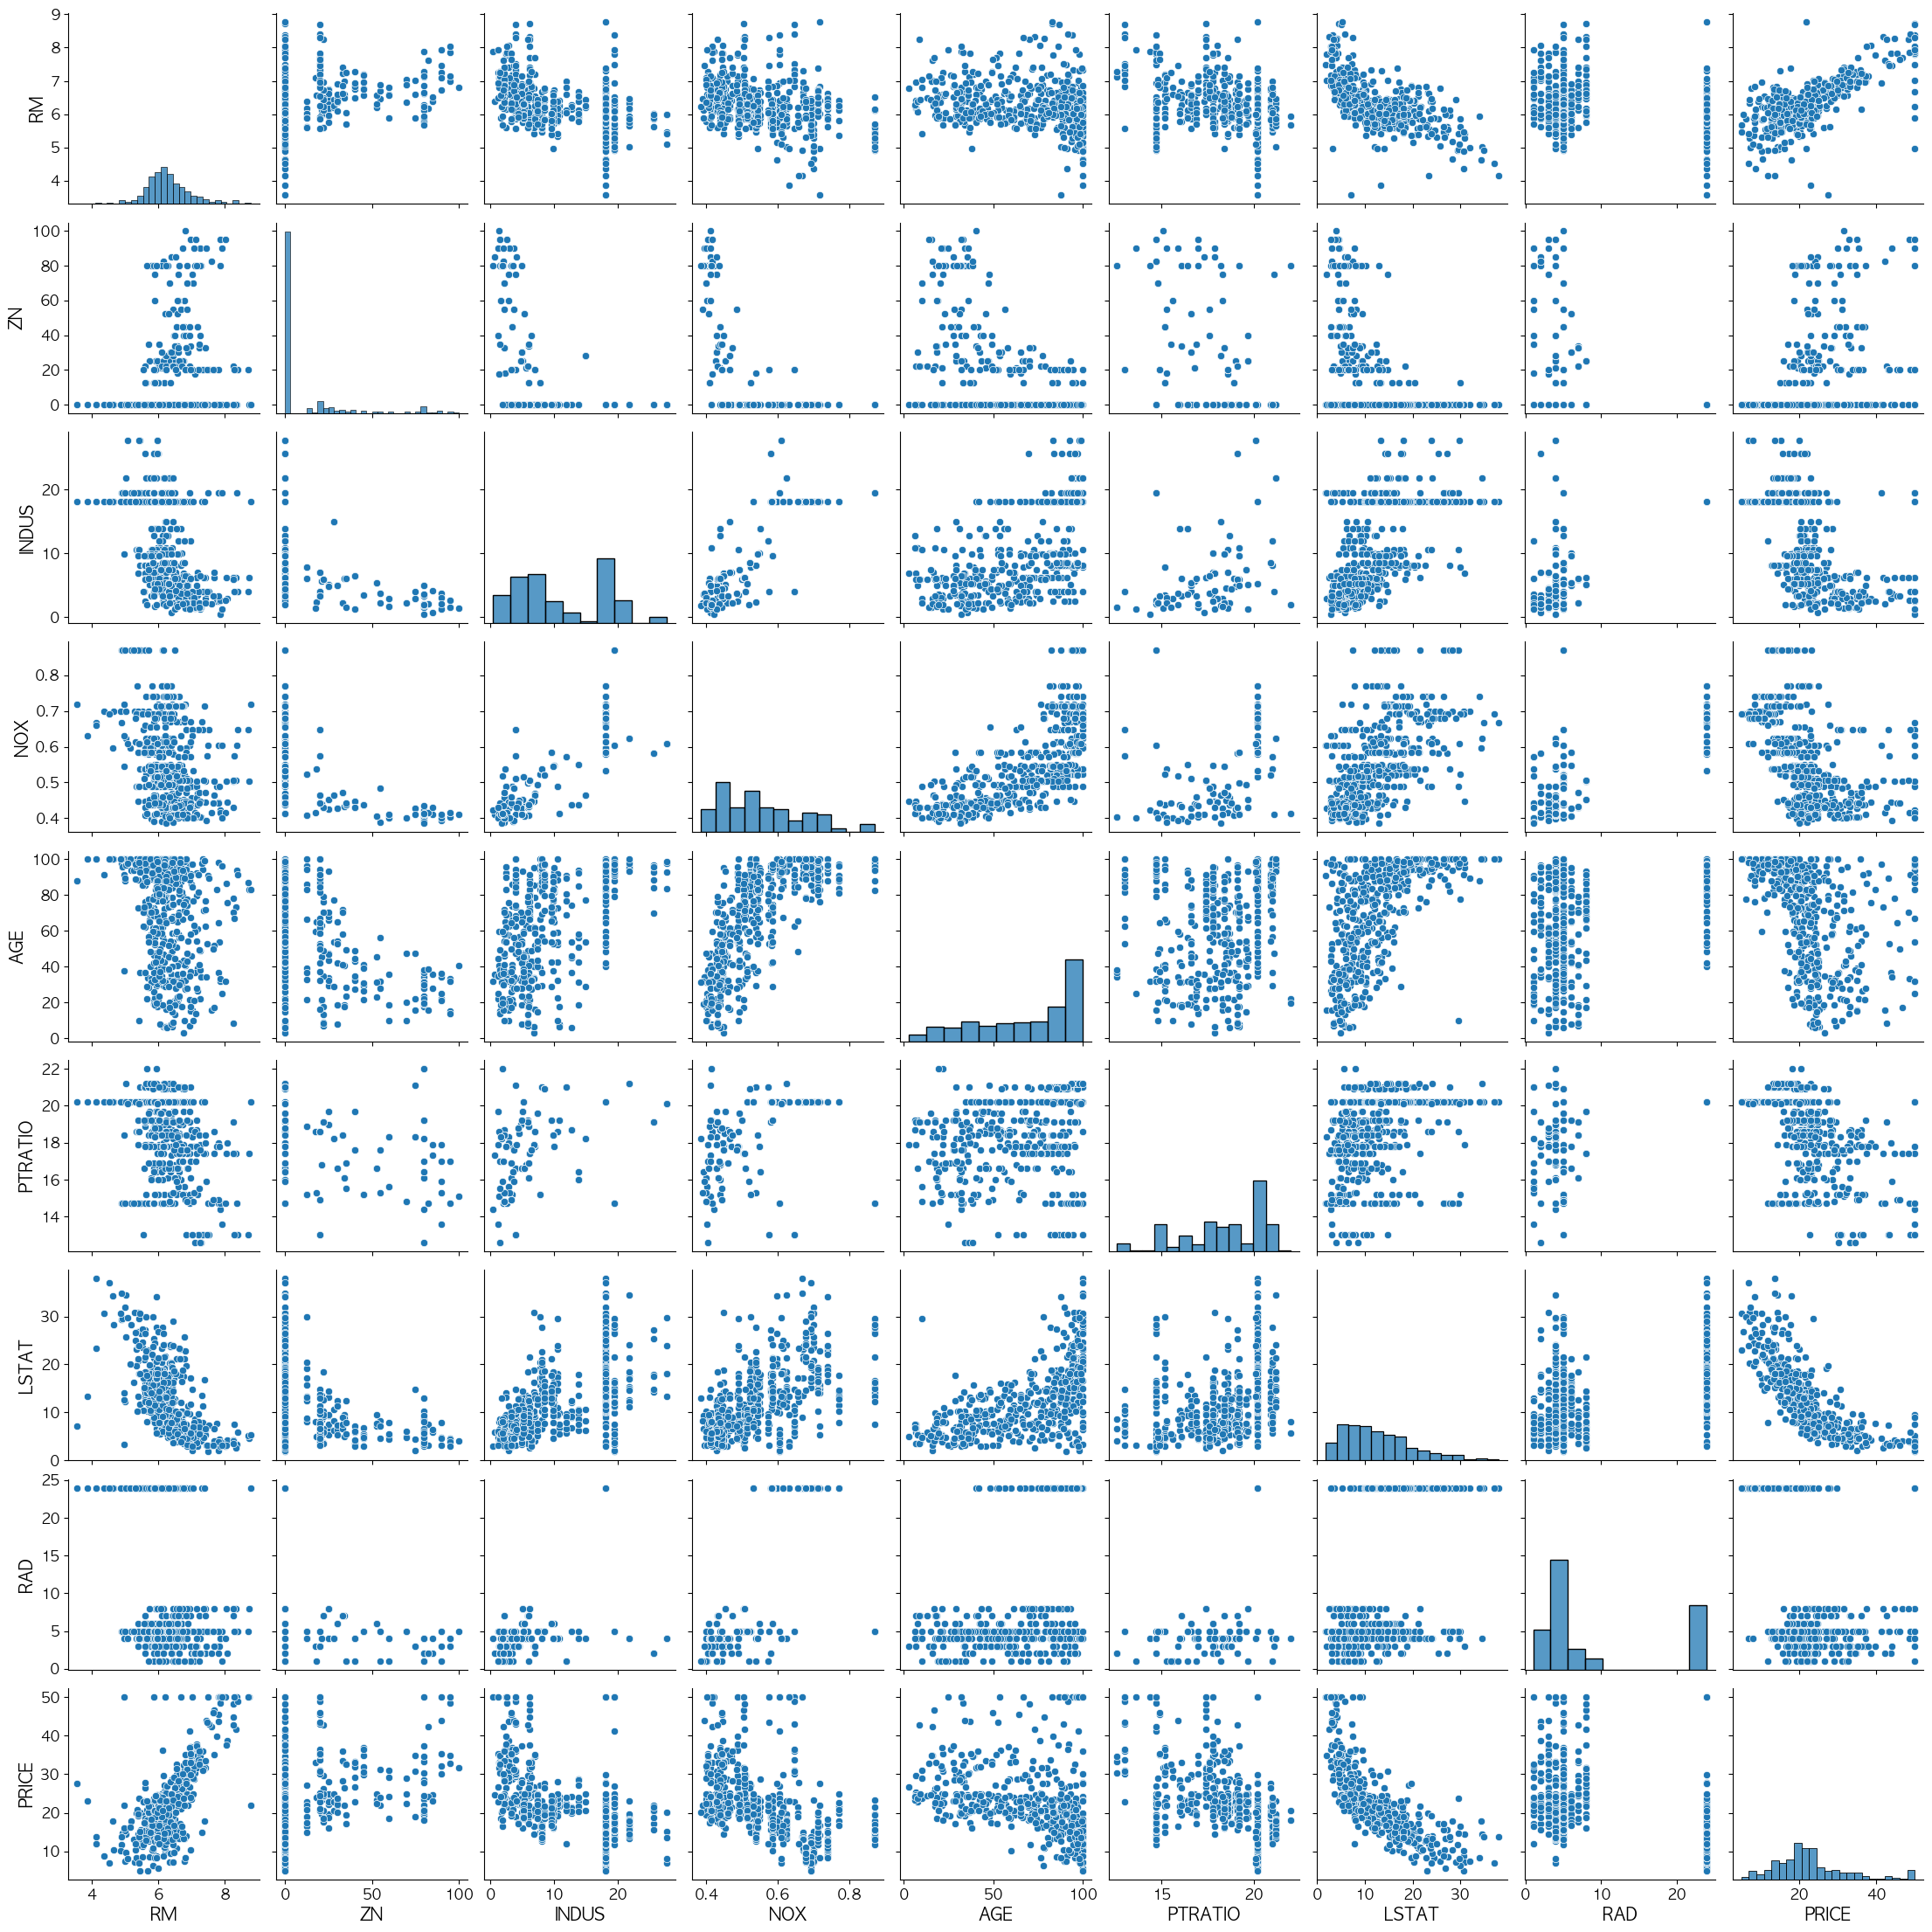

In [6]:
# 상관 관계를 파악하고자 하는 열의 리스트
cols = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD', 'PRICE']
bostonDF[cols].corr()

sns.pairplot(bostonDF[cols], height=2.5)
plt.show()

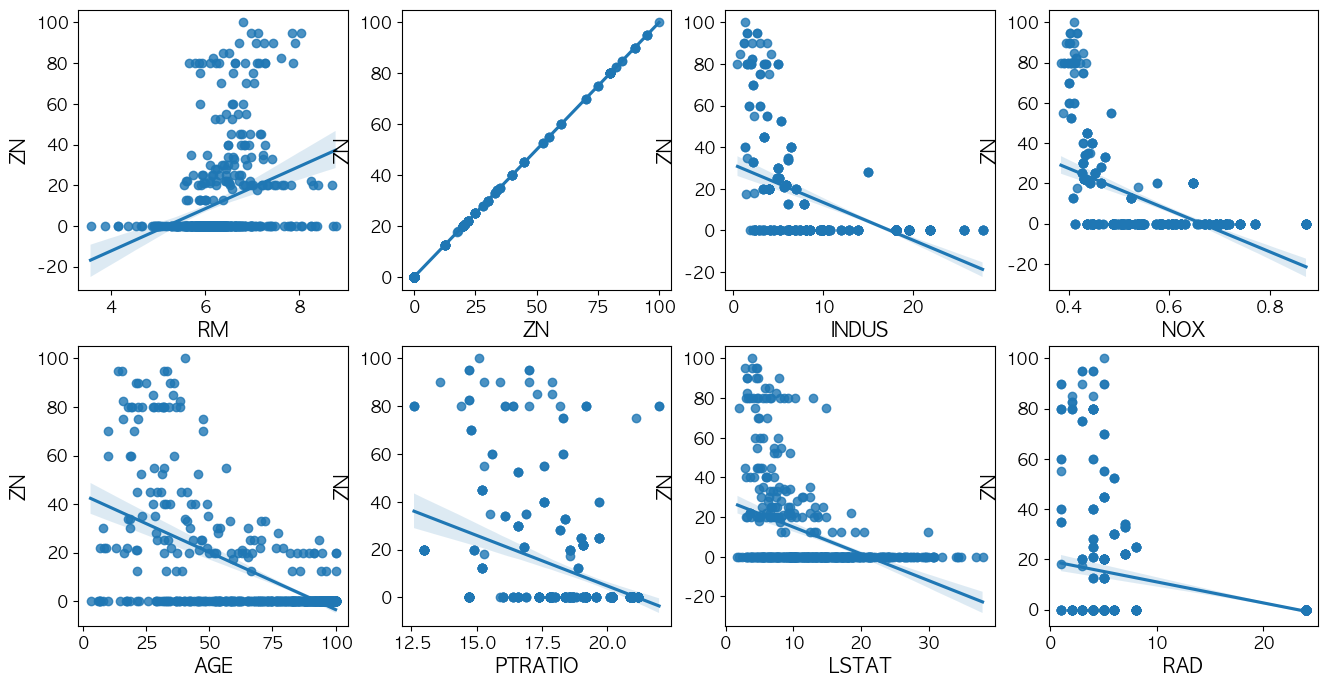

In [7]:
# y의 자리만 다른 컬럼 이름으로 수정하면 그 컬럼과의 상관관계를 파악하는 것이 가능함.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y='ZN', data=bostonDF, ax=axs[row][col])



In [8]:
from scipy import stats
slope, intercept, r_value, p_value, stderr = stats.linregress(bostonDF['RM'], bostonDF['PRICE'])

print('기울기:', slope)
print('절편:', intercept)
print('상관 계수:', r_value)
print('불확실성 정도:', p_value)
print('방이 4개일 각 주택의 가격:', 4 * slope + intercept)

기울기: 9.102108981180313
절편: -34.67062077643858
상관 계수: 0.6953599470715396
불확실성 정도: 2.487228871007385e-74
방이 4개일 각 주택의 가격: 1.737815148282671


In [9]:
#단병량 회귀 분석 수행
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
slr.fit(X, y)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


In [10]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, min_samples=50, loss='absolute_error',
                         residual_threshold=5.0, random_state=42)
ransac.fit(X, y)

print('기울기:', ransac.estimator_.coef_[0])
print('절편', ransac.estimator_.intercept_)

기울기: 9.520174967245959
절편 -36.4927681091264


In [11]:
from sklearn.model_selection import train_test_split

X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)

str = LinearRegression()

slr.fit(X_train, y_train)

# 훈련용 데이터를 학습.
y_train_pred = slr.predict(X_train)

# 테스트용 데이터를 학습.
y_pred = slr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 오차 값은 높은 것이 성능이 안 좋은 것
# 과소 적합의 예시
print('훈련 데이터의 MSE:', mean_squared_error(y_train, y_train_pred))
print('테스트 데이터의 MSE:', mean_squared_error(y_test, y_pred))

# r2_score는 높은 것이 성능이 좋은 것.
print('훈련 데이터의 r2_score:', r2_score(y_train, y_train_pred))
print('테스트 데이터의 r2_score:', r2_score(y_test, y_pred))


훈련 데이터의 MSE: 45.01275449524406
테스트 데이터의 MSE: 40.35144969787306
훈련 데이터의 r2_score: 0.48788928532759923
테스트 데이터의 r2_score: 0.45846499343030667


# 다변량 선형 회귀
보스턴 주택 가격을 다변량 선형 회귀를 이용해서 예측

In [13]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
print(y_target.head())
print(X_data.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [29]:
from sklearn.model_selection import train_test_split
# 테스트 데이터를 70:30 으로 분리함.
# 8:2나 9:1도 사용해보고 경진대회에서는 100% 사용하는 것도 고려해야 함.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score




# mse는 제곱을 함. 실제 데이터보다 스케일이 큰 경우가 많음.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', R2)

# ---- test_size: 0.3 ----
# MSE: 21.517444231177127
# RMSE: 4.638689926172812
# R2: 0.7112260057484943

# ---- test_size: 0.2 ----
# MSE: 24.29111947497418
# RMSE: 4.928602182665403
# R2: 0.6687594935356229

# ---- test_size: 0.1 ---- best
# MSE: 14.995852876582985
# RMSE: 3.872447917865776
# R2: 0.759813553353242


MSE: 24.29111947497418
RMSE: 4.928602182665403
R2: 0.6687594935356229


In [32]:
# 회귀 계수와 절편 값을 확인
print('절편:', lr.intercept_)

# 다변량 회귀이기 때문에 값이 많이 나옴.
print('기울기:', lr.coef_)

절편: 30.24675099392308
기울기: [-1.131e-01  3.011e-02  4.038e-02  2.784e+00 -1.720e+01  4.439e+00
 -6.296e-03 -1.448e+00  2.624e-01 -1.065e-02 -9.155e-01  1.235e-02
 -5.086e-01]


#### score.csv 파일의 데이터를 이용해서 iq와 academy, game, tv 정보를 이용하여 score를 에측

In [36]:
df = pd.read_csv('../data/score.csv')
df.head()

,name,score,iq,academy,game,tv
0,A,90,140,2,1,0
1,B,75,125,1,3,3
2,C,77,120,1,0,4
3,D,83,135,2,3,2
4,E,65,105,0,4,4


In [39]:
import statsmodels.formula.api as sm


result = sm.ols(formula = 'score ~ iq + academy + game + tv', data=df).fit()
print('절편과 기울기:',  result.params)
print('유의 확률', result.pvalues) # 0.5
print('결정 계수:', result.rsquared) # 0.96

# 이 결과가 맞는지 

절편과 기울기: Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64
유의 확률 Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64
결정 계수: 0.9608351062148869


<function matplotlib.pyplot.show(close=None, block=None)>

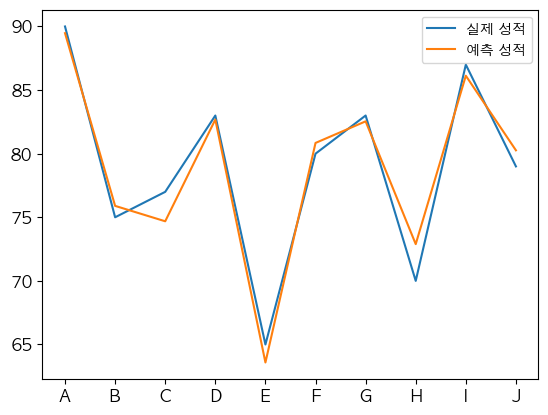

In [40]:
# 결정 계수가 높으므로 오차가 별로 없음.
plt.figure()
plt.plot(df['score'], label='실제 성적')
plt.plot(result.predict(), label='예측 성적')
plt.xticks(range(0, 10, 1), df['name'])
plt.legend()
plt.show

In [45]:
# VIF(분산 팽창 요인) 출력
X = df.drop(['score', 'name'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['features'] = X.columns

print(vif)

   VIF Factor features
0   31.162062       iq
1   13.444494  academy
2    3.054510     game
3    7.783607       tv


In [47]:
# VIF(분산 팽창 요인) 출력 - VIF가 높은 academy를 제거하고 다시 출력
X = df.drop(['score', 'name', 'academy'], axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['features'] = X.columns

print(vif)

   VIF Factor features
0    3.542391       iq
1    2.918459     game
2    2.954177       tv


In [48]:
from sklearn.linear_model import Ridge

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
print(y_target.head())
print(X_data.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [51]:
from sklearn.model_selection import cross_val_score

# 적용할 규제 값
alphas = [0, 0.1, 1, 10, 100]

for  alpha in alphas:
    ridge = Ridge(alpha = alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 folds의 평균 RMSE:{1}'.format(alpha, avg_rmse))

alpha 0일 때 folds의 평균 RMSE:5.828658946215808
alpha 0.1일 때 folds의 평균 RMSE:5.788486627032413
alpha 1일 때 folds의 평균 RMSE:5.652570965613546
alpha 10일 때 folds의 평균 RMSE:5.518166280868972
alpha 100일 때 folds의 평균 RMSE:5.329589628472148


In [55]:
from sklearn.neighbors import KNeighborsRegressor
#거리를 가지고 가중 평균을 구해서 예측
# uniform을 설정하면 일반 평화
regressor = KNeighborsRegressor (n_neighbors = 3, weights="distance")


In [58]:
X_train = [
    [0.5, 0.2, 0.1],
    [0.9, 0.7, 0.3],
    [0.4, 0.5, 0.7],
    [0.2, 0.3, 0.5]
]

y_train = [5.0, 6.8, 9.0, 4.3]

regressor.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=3, weights='distance')

In [59]:
X_test = [
    [0.2, 0.1, 0.7],
    [0.4, 0.7, 0.6]
]

pred = regressor.predict(X_test)
print(pred)

[5.893 7.324]


In [77]:
# 샘플 데이터 생성
np.random.seed(42)
m = 200

X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y+ np.random.randn(m, 1) / 10

In [78]:
from sklearn.tree import DecisionTreeRegressor

# 터미널(자식이 없는 노드 - leaf node)
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

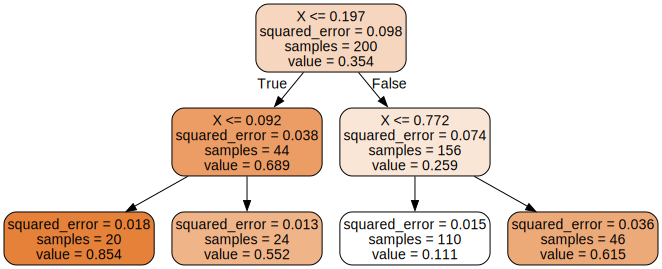

In [80]:
# 트리 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

# 트리 시각화 파일 생성
export_graphviz(
    tree_reg,
    out_file= 'decision_tree.dot',
    feature_names=['X'],
    class_names= ['y'], # target name
    rounded=True,
    filled= True
)

with open('decision_tree.dot') as f:
    dot_graph = f.read()

src = Source(dot_graph)
src

In [81]:
X = 2 * np.random.rand(m, 1)

# ravel은 차원을 하나 줄이는 역할을 수행해주는 함수
# 때문에 2차원 배열로 만들어지는 타켓은 1차원 배열이어야 해서 차원을 수정
# flatten 이나 reshape 를 이용해서 조절을 해도 됨.

y = (4 + 3 * X + np.random.randn(m, 1)).flatten()
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [83]:
# 마진(epsilon)을 줄이면 rmse가 줄어듦

from sklearn.svm import LinearSVR
# 분류는 LinearSVC
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5, random_state=42)

In [84]:
y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(y_test)
print(y_pred)
print(rmse)

[ 6.693  5.601  7.038  7.103  9.167  5.481  8.005  8.638  7.564  7.243
  6.375  8.157  8.295  4.22   8.854  7.529  8.776  7.003  6.705  7.563
  8.647 11.829  4.765  4.343  5.4    9.564  9.348  5.025 10.125  6.189
 10.969  8.35   8.995  8.583  5.862  7.453  5.046  8.626  9.51  10.971
 10.602  5.762  7.887  9.421  9.023  6.105  6.881  3.44  10.105  8.248
  5.932  9.111  8.543  6.608  4.611  6.368  7.551  8.842  7.393  7.836
  6.23   8.419  9.22   7.102  4.832  4.202  9.469  7.206  8.321  4.816
  4.384  3.778  6.326  7.061  7.609  5.73   9.238  5.65   8.531  8.898
  7.411  6.247  9.441 10.587  4.965 10.625  6.435  6.959  9.054  9.517
  6.51   7.426  9.38   4.918  4.035  4.491  3.424  3.993  3.829  7.077
  5.057  6.308 10.931  5.845  8.99   4.82   5.104  4.92   3.891  6.054
  5.229  5.025  5.013  9.22   4.6    5.655  6.397  7.587  3.598  9.985
  9.188  3.92   8.409  9.997  3.814  6.294  9.04   6.974  6.655  7.052
  5.61   6.519  7.995  6.548  7.434 10.495  4.043  4.716  6.901  8.64
  7.037

In [85]:
# 비선형 데이터 생성
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X ** 2 + np.random.randn(m, 1) / 10).ravel()

X_train = X[:80]
X_test = X[80:]

y_train = y[:80]
y_test = y[80:]

0.03551447643594253


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

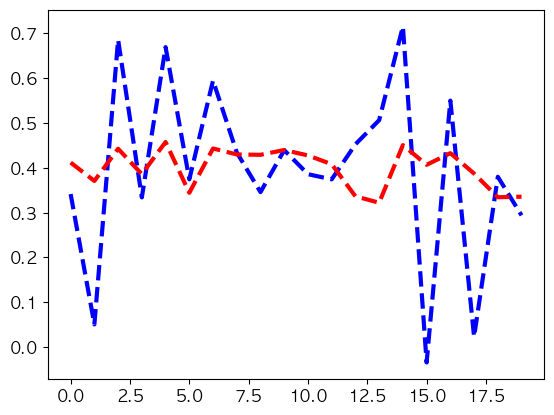

In [92]:
# 선형 svm 적용
svm_reg = LinearSVR(epsilon=0.1, random_state=42)
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)

plt.plot(y_test, 'b--', linewidth=3, label='test_set')
plt.plot(y_pred, 'r--', linewidth=3, label='predict_set')

plt.show


0.018852096606888264


<function matplotlib.pyplot.show(close=None, block=None)>

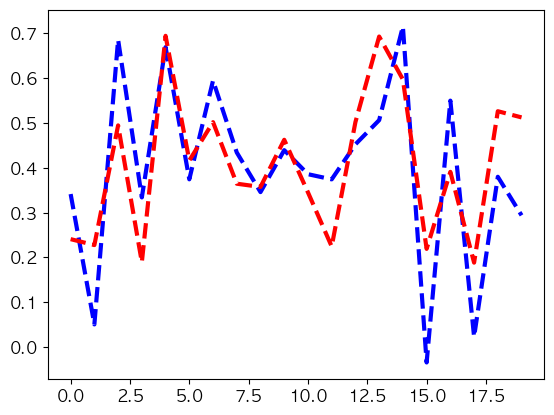

In [90]:
# 비선형 svm 적용
from sklearn.svm import SVR

# SVR은 random_state가 없음, epsilon을 작은 값을 줘야함.
svm_reg = SVR(kernel = 'poly', degree=2, epsilon=0.1)
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)

plt.plot(y_test, 'b--', linewidth=3, label='test_set')
plt.plot(y_pred, 'r--', linewidth=3, label='predict_set')

plt.show
